Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
NAME = "Anant Verma"

---

# Assignment 1
Welcome to the first NNFL assignment. Please read the instructions given below carefully before attempting the assignment.  
- Do NOT import any other modules
- Do NOT change the prototypes of any of the functions
- Sample test cases are already given, test your code using these sample cases
- Grading will be based on hidden test cases
- Please solve this notebook using [Google Colab](https://colab.research.google.com/) as the required packages are already installed 

In [ ]:
#DO NOT IMPORT ANY OTHER LIBRARY
#Run these cells as it is
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math
from tqdm import tqdm
from copy import deepcopy
import seaborn as sns
try:
    import plotly.graph_objects as go
except:
    !pip install plotly # Or install the plotly library manually
    import plotly.graph_objects as go    

from matplotlib.pyplot import figure
import time
from tabulate import tabulate

# required only for jupyter notebooks / while running on colab
%matplotlib inline 

# set seed
seed = 42
np.random.seed(seed)

# Part I - Data pre-processing + logistic regression

---



---



---


This is the first section of the assignment. You will implement Logistic Regression to create a model that predicts which passengers survived the Titanic shipwreck.

 There is an explanation given before each code block as well as it has been mentioned what you would have to code. Read everything carefully.

Introduction: Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables. It uses the sigmoid activation function. The diagram given below will give you a brief idea. We will explain more about logistic regression as we proceed.
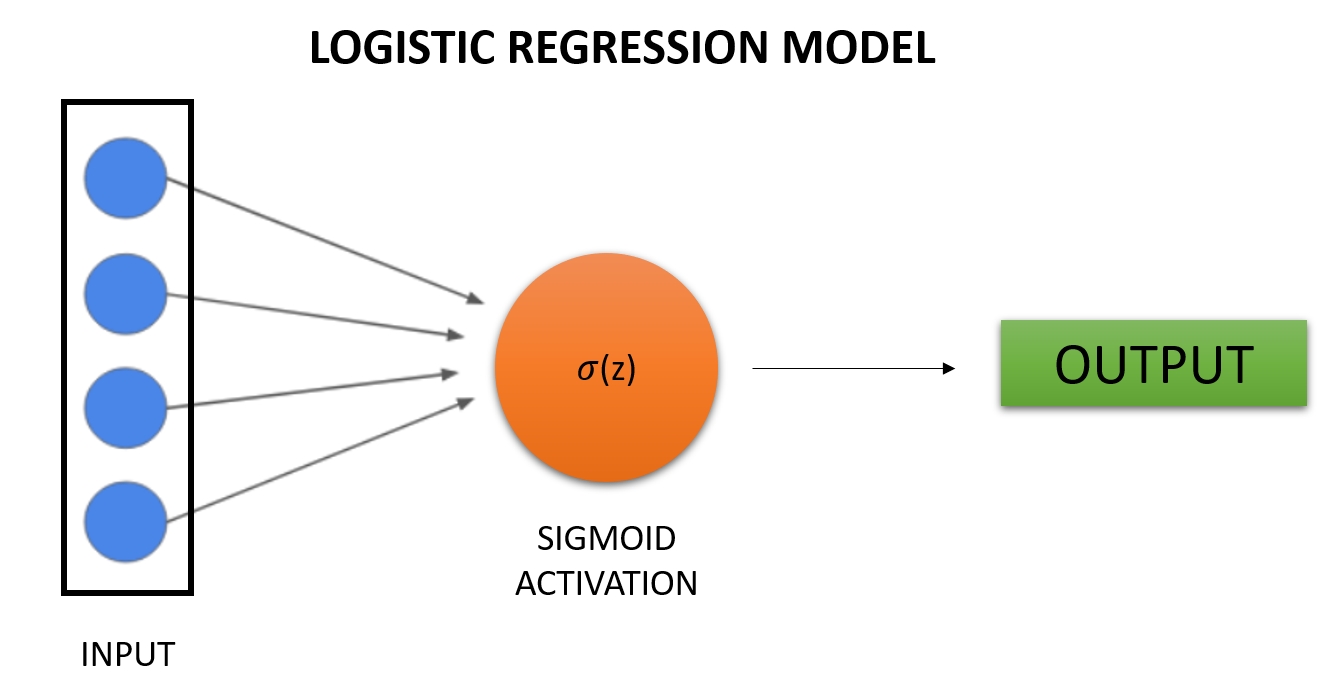

## Standardization [0.25 marks]

Standardizing the data is a good practice. Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. Standardizing features helps us in training the model faster.

The formula for standardizing the data is given below:

# $X′= \frac{X−μ}{σ}\hspace{4cm}-(a)$ 

where

μ : mean of the attribute

σ : standard deviation of the attribute

Numpy provides functions to implement the above

For additional information refer [this](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff).

In [ ]:
#GRADED - 0.25 MARKS
def standardize(X):
    """
    Args:
        'X': numpy ndarray 
    Returns:
        'X_norm': normalized X also in numpy ndarray format
    """
    
    # YOUR CODE HERE
    return (X - np.mean(X, axis = 0))/np.std(X, axis = 0)

In [ ]:
# Sample test cases
np.random.seed(seed)
x = np.random.randint(0, 100, size = (10,2))
x = standardize(x)
assert np.allclose(x[1,0], -1.0394283)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

## Initialize parameters [0.25 marks]

As uncomplicated it may seem, initializing your weights play an important role in overall performance of your model. If initial wts. are too small/large then it may lead to problem of vanishing/emploding gradients respectively.

For introductory purpose, we will be taking weights from Gaussian Distribution. But there are has been tremendous research in this area, and Xavier Initialization has proved to be very effective for multiple tasks. There are in-built methods for Xavier initialization in frameworks like tensorflow, pytorch, caffe. To understand the maths behind Xavier Initialization, refer to the article attached below!

Refer to this article to understand the importance of effective initialization. [deeplearning.ai/notes](https://www.deeplearning.ai/ai-notes/initialization/#IV)

For our model we will be initialising Weights as an array or random integers and bias as array of zeroes. You can take help of formula $(i)$ from the next section's theory i.e. forward to know the relation between the dimensions of W and b with respect to X and Y. 

### 
Initialise weights with the shape given in function below having values **between 0 and 1** using numpy.random.rand function.

(NOTE : USE **numpy.random.rand** function for this. Different functions can create different random values and this might result in your code not passing the test cases)

> Initialise bias with the shape given below as a numpy array having all zeros.

In [ ]:
#GRADED - 0.25 MARKS
def initialize_parameters(X, Y):
    """
    Args:
    'Y': ndarray of shape (m,output_size)
    'X': ndarray of shape (m, no. of features)
    Returns:
    'W', 'b': Wts. and biases
    'W' : ndarray of shape(no. of features, output_size)
    'b' : ndarray of shape(1, output_size)
    
    USE output_size = 1 since we are only predicting whether a passenger survives or not. 
    """
    # YOUR CODE HERE
    m, output_size, features = Y.shape[0], Y.shape[1], X.shape[1]
    
    W, b = np.random.rand(features, output_size), np.zeros((1,output_size))
    return W, b

In [ ]:
# sample test case
np.random.seed(seed)
W_check, b_check = initialize_parameters(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
assert W_check.shape == (2,1)
assert b_check.shape == (1,1)
assert np.allclose(W_check[0],[0.3745401])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

## Forward [0.5 marks]

This is the function where actual calculation of the prediction values happen with the help of weights and bias.

For two varaibles it is a straight line of form $y = mx + c$ there m and c are slope and intercepts of line respectively but for more than one variables since each variable contributes to the output value the equation becomes a dot product of weights with the variables. Where each weight ($w_i$) represent the propotionality factor of prediction values with respect to the corresponding variable ($x_i$). $b$ is refered as bias which is analogus to the intercept value in case of two variables. 

# $ \boxed{Y_{pred} = Activation function (w_1 x_1 + w_2 x_2 + .... + w_i x_i + b)}\hspace{4cm} -(i)$

The activation function we'll be using here will be sigmoid. This ensures differentiability and gives output in the range of [0,1], which we want

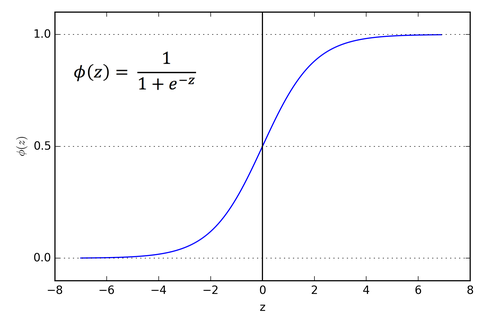

# $ Y_{pred} = sigmoid (X \cdot W + b)$

In [ ]:
#GRADED - 0.25 MARKS
def sigmoid(Z):
    """
    Args:
    'Z': ndarray of shape (m,output_size)
    Returns:
    calculated sigmoid of Z
    """
    # YOUR CODE HERE
    return 1/(1+np.exp(-Z))

In [ ]:
#sample test case
y=sigmoid(np.array([4, 7]))
assert np.allclose(y, [0.9820137, 0.9990889])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

In [ ]:
#GRADED - 0.25 MARKS
def forward(X, W, b):
    """
    Args:
    'X': ndarray of shape (m,no.of features)
    'W': ndarray of shape (no. of features, output_size)
    'b': ndarray of shape (1, output_size) 
    Returns:
    calculated Y_pred value using X,W and b
    """
    # YOUR CODE HERE
    return sigmoid(np.dot(X, W)+b)

In [ ]:
#sample test case
#DO NOT CHANGE THIS CODE
np.random.seed(seed)
X_test = np.random.randn(2,1)
np.random.seed(seed+1)
W_test = np.random.randn(1,2)
np.random.seed(seed+2)
b_test = np.random.randn(1,2)
forward_test = forward(X_test, W_test, b_test)
assert np.allclose(forward_test, [[0.3491538, 0.7037254], [0.3129843, 0.8087592 ]])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

## Loss [0.5 marks]

A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. There is not a single loss function that works for all kind of data. It depends on a number of factors including the presence of outliers, choice of machine learning algorithm, time efficiency of gradient descent, ease of finding the derivatives and confidence of predictions.

For our dataset, we have chosen Binary Cross Entropy Loss because of its ease of implementation and wide use in logistic regression problems

# $ BCE = \frac{-\sum_{i = 1}^{m} (Y^{true}_ilog({Y^{pred}_i}) + (1-Y^{true}_i)log(1-{Y^{pred}_i}))}{m}$

here $Y^{pred}_i$ is the $i^{th}$ prediction value corresponding to $i^{th}$  $Y^{true}_i$ (actual)value. 
$m$ is the number of actual values 

In [ ]:
#GRADED - 0.5 MARKS
def loss(y_pred, y_true):
    """
    Args:
    'y_pred': ndarray of shape (m,1) storing output predictions
    'y_true': ndarray of shape (m,1) storing ground truths
    Returns:
    'bce': binary cross entropy
    """
    
    # YOUR CODE HERE
    m = y_pred.shape[0]
    return -(np.sum((y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred)), axis = 0))/m

In [ ]:
#sample test case
y1 = np.array([[0.15], [0.85]])
y2 = np.array([[0], [1]])
bce_sample = loss(y1, y2)
assert np.allclose(bce_sample, 0.162518)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

## Gradients [0.5 marks]

In order to optimise our model and increase it's accuracy we will use a technique called **Stochastic Gradient Decent**(SGD). As per wikipedia Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties. From this we understand that we would be minimising the error between our prediction values and actual values. 
But before that we need to calculate our prediction values using the same formula as in the forward function. 

Now after getting certain value of loss in our first prediction we would change our weights and bias in a manner that our loss reduces.

# $\boxed{W_j = W_{j-1} - \alpha * dW }     \hspace{3cm}    -(i)$
# $\boxed{b_j = b_{j-1} - \alpha * db }     \hspace{3cm}    -(ii)$

where $\alpha$ is a constant called **learning rate** and dW is the partial derivative part given by the following formula

# $ dW = \frac{\partial J(w,b)}{\partial W} $
Same goes for db

# $ db = \frac{\partial J(w,b)}{\partial b} $

Where J is our BCE loss function:

# $ \frac{-\sum_{i = 1}^{m} (Y^{true}_ilog({Y^{pred}_i}) + (1-Y^{true}_i)log(1-{Y^{pred}_i}))}{m}$

By applying chain rule we can get vector forms of all dw's as dW and all db's as dB

# $ dW =  \frac{X^T*(Y_p - Y_t)}{m}  $

# $ db =  \sum\frac{(Y_p - Y_t)}{m}  $

$dW$ and $db$ are together refered as gradients 

In [ ]:
#GRADED - 0.5 MARKS
def grads(X, y_pred, y_true):
    """
    Args:
    'X': The input matrix 
    'y_pred': ndarray of shape (m,1) storing output predictions
    'y_true': ndarray of shape (m,1) storing true values (survived or not)
    Returns:
    'dW': gradients of weights
    'db': gradient of biases 
    """
    
    # YOUR CODE HERE
    m = y_pred.shape[0]
    return np.dot(X.T,(y_pred-y_true))/m, np.sum(y_pred-y_true, axis = 0)/m

In [ ]:
#sample Test Case for function grads
np.random.seed(seed)
X_test = np.random.randn(3,2)
np.random.seed(seed+1)
y_pred_test = np.random.randn(3,1)
np.random.seed(seed+2)
y_true_test = np.random.randn(3,1)
gradsop = grads(X_test,y_pred_test,y_true_test)
assert np.allclose(gradsop[0],[[-0.1866305], [-1.0491597]])
assert np.allclose(gradsop[1],-0.9471557)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

## Stochastic Gradient Decent [0.25 marks]

After calculating gradients of weights and bias, we will now do the changes in their respective values with the help of expressions $(ii)$ and $(iii)$ discussed above. 
Learning Rate ($\alpha$) gives the measure of The amount that the weights are updated during training. Its value lies between 0.0 and 1.0. 

The weights are now updated via the learning rules:

$$ W = W - \alpha \text{ } dW $$
$$ b = b - \alpha \text{ } db $$

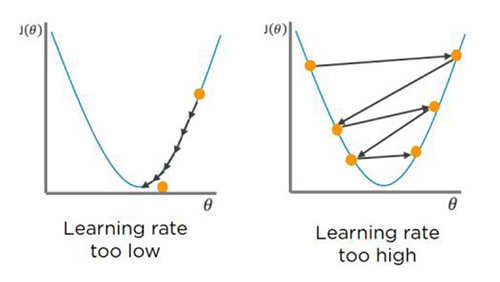

In the above two graphs we see the effect of high learning rates and effect of low learning rates. Each arrow depicts the change in the value at each subsequent step. A higher learning rate might saturate fast towards the local minimum where as the low learning rate takes much more iterations. But high learning rate might also start moving away from the local minimum hence increasing the loss. 


In [ ]:
#GRADED - 0.25 MARKS
def sgd(W, b, grads, alpha):
    """
    Args:
    'W' : (n, output_size) array
    'b' : (1,output_size)
    'grads': list of dW, db
    'alpha': learning rate
    Return:
    Updated parameters
    updated_w : updated value of 'W' using the formula given above 
    updated_b : updated value of 'b' using the formula given above
    """
    
    # YOUR CODE HERE
    return W-alpha*grads[0], b-alpha*grads[1]

In [ ]:
#Sample test case for function sgd
#DO NOT CHANGE THIS CODE
np.random.seed(seed)
w_test = np.random.randn(2,1)
np.random.seed(seed+1)
b_test = np.random.randn(1,1)
sgdop = sgd(w_test,b_test,[w_test,b_test],0.01)
assert np.allclose(sgdop[0],[[ 0.4917470], [-0.1368816]])
assert np.allclose(sgdop[1],[[0.2548259]])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

## Load Dataset [0.25 marks]

Before building the final model, let's load the dataset we will use. The dataset provided is the Titanic Dataset from Kaggle. More info about the dataset can be found here: [Titanic Dataset](https://www.kaggle.com/c/titanic)

Use the following link to load the dataset using pandas : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

The following operations need to be performed in the function "load_dataset" below:

1) Load the dataset (train.csv) into a pandas dataframe. Ensure there are 12 columns, i.e. PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked

2) Drop the following columns from the dataset: Name, Ticket, Cabin and Embarked. *Why do we drop these?*

3) We can see that there are some 'NaN' values in the Age columns. Use a pandas function to drop these missing values. Refer to the [Pandas documentation](https://pandas.pydata.org/docs/index.html) if you need help

In [ ]:
#GRADED - 0.25 MARKS
def load_dataset():
    """
    Return:
    Pandas Dataframe with the appropriate dropped columns and values
    df : loaded dataframe of train.csv with operation performed, mentioned above
    """
    
    # YOUR CODE HERE
    df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
    assert(df.shape[1] == 12)
    df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], inplace = True, axis = 1)
    df.dropna(subset=['Age'], inplace = True)
    return df

In [ ]:
#Sample test case for function load_dataset
#DO NOT CHANGE THIS CODE
df = load_dataset()
assert df.shape[0]==714
assert df.shape[1]==8
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

In [ ]:
# DATASET PREPARATION (UNGRADED)
df = load_dataset()
df['Sex'][df['Sex']=='male'] = 1
df['Sex'][df['Sex']=='female'] = 0
X_df = df.iloc[:,2:] 
Y = np.array(df['Survived']).astype(int)
Y = Y.reshape(Y.shape[0],1)
X = np.array(X_df).astype(float)
X = X.reshape(X.shape[0],6)
X_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


## Build Model [0.5 marks]

Congratulations! Now we have all the helper functions required to build our model. In this final function, we will call above functions in a systematic way and let our model train on given dataset. Follow the instructions carefully.

### Steps to follow for building the model
The following operations need to be performed in the function "model" below:
<br/>
<br/>
1) Standardize X which is input to the model (Note that X is currently NOT standardized). DO NOT standardize Y, there is no need.

2) Ensure shape of X is (m,no.of features) where m is the number of data points and no. of features is 6

3) Initialise the parameters W and b using X (standardized) and Y with the help of the function *initialize_parameters*

4) For N number of iterations :

    - Calculate y_predicted by performing a forward pass(No need to standardize this y_predicted)
    
    - Find out the loss using y_predicted and y_true 
    
    - Append the current loss to a list of all losses so that we can return it and plot it
    
    - Calculate the Gradients
    
    - Update W and b using SGD
    
    - Now use these updated W and b to perform a forward pass in the next iteration and again compute loss, gradients,sgd and so on
    
NOTE : Use all the functions you have declared uptill now in the model function

In [ ]:
#GRADED - 0.5 MARKS
def model(X , Y, iterations=5000, learning_rate=0.001):
    """
    Args:
    'X': ndarray of shape (m,no. of features) which is NOT Standardized
    'Y': ndarray of shape (m,1)
    'iterations': iterations for training our data
    Returns:
    y_pred: predicted value of output
    y_true: true value of output (no need to standardize)
    losses: for grading purpose
    W , b : The final TRAINED weights and biases of the model
    Return in the following order : [y_pred , y_true, losses , W , b]
    """
    
    # YOUR CODE HERE
    X = standardize(X)
    assert(X.shape[0] == 714)
    assert(X.shape[1] == 6)
    W, b = initialize_parameters(X, Y)
    losses = list()
    m = Y.shape[0]
    y_pred = np.empty([m,1])
    for i in range(iterations):
      y_pred = forward(X, W, b)
      curr_loss = loss(y_pred, Y)
      losses.append(curr_loss)
      curr_grads = grads(X, y_pred, Y)
      W, b = sgd(W, b, curr_grads, learning_rate)
    # plot loss curve 
    plt.plot(losses)
    return y_pred , Y, losses , W , b 

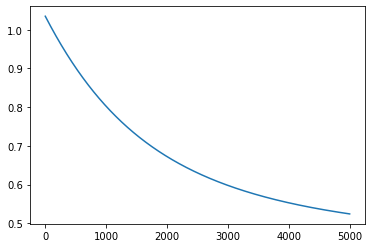

In [ ]:
#RUN THIS CELL AS IT IS
np.random.seed(1)
y_pred , y_true, losses , trained_w , trained_b = model(X, Y)

In [ ]:
#Sample test case
assert np.allclose(losses[100], 1.005192611973119)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

In [ ]:
predictions = [y_pred>=0.5]
print("Training Accuracy: {} %".format(100 - np.mean(np.abs(predictions - Y)) * 100))

Training Accuracy: 77.73109243697479 %


# Section 2 - Neural Networks 

### Overview: (read carefully)
This section asks you to complete several functions to implement a multi layered neural network from scratch
1. Use the preprocess functions that you have already defined for the Titanic Dataset
2. Implement various activation functions.
3. Initialize the weight matrices and bias vectors of the neural network depending on its architecture.
4. Implement the forward propagation module.
5. Compute cross entropy loss function and L2 Regularization
6. Implement the backward propagation module to compute gradients of loss function w.r.t. weights of the network.
7. With the help of batch gradient descent optimizer, update the weights of the neural network using gradients computed in the previous step.
8. Repeat steps 4-7 for several iterations to train the neural network on the given dataset.
9. Report the accuracy of the neural network on the data to check for overfitting or underfitting.

## Building the model

### Architecture:

A four-layer fully-connected neural network. The net has an input dimension of I, a hidden layer dimensions of H1, H2 and H3 and performs classification over 2 classes. Hence the output layer will consist of 1 neuron.

We train the network with a sigmoid loss function and L2 regularization on the weight matrices. The network uses a ReLU nonlinearity after the first, second and third fully connected layer and Sigmoid nonlinearity for the fourth full connected layer.

In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - ReLU - fully connected layer - ReLU - fully connected layer - sigmoid

The outputs of the fourth fully-connected layer give us the results.

### Step 1: A function to initialization of the parameters [0.5 marks]

In [ ]:
#GRADED - 0.5 MARKS
def Initialization(I, H1, H2, H3, O):
    '''
    Weights are initialized to random values in the range [0, 0.1) using np.random.rand appropriately and
    biases are initialized to zero. The dimensions of the
    parameters as as follows:- 

          W1: First layer weights; has shape (H1, I)
          b1: First layer biases; has shape (H1, 1)
          W2: Second layer weights; has shape (H2, H1)
          b2: Second layer biases; has shape (H2, 1)
          W3: Third layer weights; has shape (H3, H2)
          b3: Third layer biases; has shape (H3, 1)
          W4: Fourth layer weights has shape (O,H3)
          b4: Fourth layer biases; has shape (O,1)

          Inputs:
          - I: The number of features of the input data.
          - H1: The number of neurons in the hidden layer - 1.
          - H2: The number of neurons in the hidden layer - 2.
          - H3: The number of neurons in the hidden layer - 3.
          - O: The number of outputs(i.e. 1).

          Outputs:
          - paramters_final: List containing of parameters 
          after they are initialized with appropriate values in this order:
          [W1, b1, W2, b2, W3, b3, W4, b4 ]
        '''
    
    # YOUR CODE HERE
    def generateRandom(lo, hi, shape):
      return np.random.rand(*shape)/10
      # return lo + (hi-lo)*np.random.rand(*shape)

    W1, b1 = generateRandom(0, 0.1, [H1, I]), np.zeros((H1, 1))
    W2, b2 = generateRandom(0, 0.1, [H2, H1]), np.zeros((H2, 1))
    W3, b3 = generateRandom(0, 0.1, [H3, H2]), np.zeros((H3, 1))
    W4, b4 = generateRandom(0, 0.1, [O, H3]), np.zeros((O, 1))

    return [W1, b1, W2, b2, W3, b3, W4, b4]

In [ ]:
#Sample test case
np.random.seed(2)
tln = Initialization(2, 3, 2, 1, 1)
assert tln[0].shape == (3, 2)
assert tln[1].shape == (3, 1)
assert tln[2].shape == (2, 3)
assert tln[3].shape == (2, 1)
assert tln[4].shape == (1, 2)
assert tln[5].shape == (1, 1)
assert tln[6].shape == (1, 1)
assert tln[7].shape == (1, 1)
assert np.allclose(tln[0][0][0],0.04359949021420038)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

### Step 2: Implement the activation function [0.3 marks]

Activation functions used:

$$relu(z) = max(0, z)$$
$$sigmoid(z) = 1 / (1 + e^{-z})$$

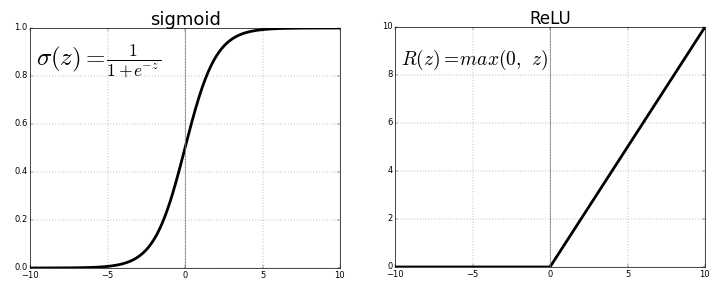

In [ ]:
#GRADED - 0.3 MARKS
def relu(x):
    # YOUR CODE HERE
    return np.maximum(0, x)

In [ ]:
# sample test case
assert np.allclose(relu(np.array([[3,-4]])), np.array([[3,0]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

In [ ]:
# SIMILAR TO PART 1
def sigmoid(z):
    '''
    This function is used to calculate the sigmoid of z.
    Make sure to keep the array inside the exponent of dtype='float128' so that larger values can be handled

    Input: 
    -z: The sigmoid of all the elements of z needs to be calculated. z can have any shape (1-D or 2-D numpy array), and any of int or float datatype

    Returns:
    -y: The sigmoid of z

    Note: value has the same shape as z

    '''

    # YOUR CODE HERE
    return np.array(1/(1+np.exp(-z, dtype = 'float128')), dtype = 'float128')

### Step 3: A function to implement forward propagation [0.7 marks]


### Terminologies used for describing the computations of the Neural Network:
* Superscript $[h]$ denotes a quantity associated with the $h^{th}$ layer. 
    - Example: $a^{[h]}$ is the $h^{th}$ layer activation. $W^{[h]}$ and $b^{[h]}$ are the $h^{th}$ layer parameters.
* Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $y^{(i)}$ is the ground truth label corresponding to the $i^{th}$ training example.



* A layer of the neural network consists of:
    - a weight matrix $W^{[h]}$of shape (size of current layer, size of previous layer)
    - a bias vector $b^{[h]} $of shape (size of current layer, 1)
    - an activation function $ g^{[h]} $
* Computation in a layer $h$ of the neural network can be described as follows:
  - Let $a^{[h-1]}$ be the activations of the previous layer or input data (if current layer is first hidden layer), of shape (size of previous layer, number of examples).
  - Let $ z^{[h]} $ be the pre-activation value. Then, $ z^{[h]} $ is computed as :
  $$ z^{[h]} = W^{[h]}.a^{[h-1]}+b^{[h]}$$
  where $ . $ denotes matrix multiplication.
  So, $z^{[h]}$ will be of shape (size of current layer, number of examples).
  - Let $a^{[h]}$ denote post activation value. It is computed as:
  $$ a^{[h]} = g^{[h]}(z^{[h]}) $$
  Note that shape of $a^{[h]}$ is same as that of $a^{[h]}$.
  
  - Also note that $A^{[0]}$ is nothing but $X$, the input data.

This function carries out computations of a single layer of the neural network:
 $$ z^{[h]} = W^{[h]}.a^{[h-1]}+b^{[h]}$$
 $$ a^{[h]} = g^{[h]}(z^{[h]}) $$

In [ ]:
#GRADED - 0.7 MARKS
def feed_forward(X, params):
    '''
    Using the formulae given below, apply forward propagation for each layer according to the defined architecture

    z = wX + b
    a = g(z)  {g being the non linear function i.e the activation function}

    Inputs:
    - X : Input data of shape (6, total_number_of_rows). Each X[i] is a feature and each X[:][i] is a training sample
    - params: List containing the parameters (weights and bias of each layer in the order: w1,b1,w2,b2,w3,b3,w4,b4) of the model

    Outputs:
    - y_out (or a4) : predicted price
    - l : List containing the activation and linear outputs of each layer in the following fashion
      [z1,a1,z2,a2,z3,a3,z4,a4]
    '''
    
    # YOUR CODE HERE
    W1, b1, W2, b2, W3, b3, W4, b4 = params
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = relu(z3)
    z4 = np.dot(W4, a3) + b4
    a4 = sigmoid(z4)

    return a4, [z1, a1, z2, a2, z3, a3, z4, a4]

In [ ]:
np.random.seed(2)
para = Initialization(6, 3, 2, 2, 1)
y_forward,l = feed_forward(np.random.rand(6,10), para)
assert y_forward.shape == (1, 10)
assert np.allclose(y_forward[0][5], 0.500007252532484)
assert l[0].shape==(3,10)
assert l[2].shape==(2,10)
assert l[6].shape==(1,10)
assert np.allclose(l[0][0][1], 0.055247803682756134)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

### Step 4: A function to calculate the loss [0.5 marks]

$L = \frac{1}{m} * \sum(-{yd* \log{(y\_pred+eps)}} - (1 - yd)*\log{(1 - y\_pred+eps)})$ <br>

where $yd$ is the desired value of y i.e. the one present in our set whereas $y\_pred$ is the value of target we have predicted, and m is the no of examples. <br> IMPORTANT: Add epsilon($eps$) inside the log function for numerical stability.

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

eps=1e-8

In [ ]:
# GRADED - 0.5 Marks
def loss_compute(y_pred, yd):
    '''
    Inputs: 
    - y_pred: numpy array containing predicted values of target
    - yd: numpy array containing desired values of y given in the 
    dataset

    Outputs:
    - loss: Calculate and return the loss using the above formula
    '''
    
    # YOUR CODE HERE
    m = y_pred.shape[1]
    return np.sum(-yd*np.log(y_pred+eps) - (1-yd)*np.log(1-y_pred+eps), axis = 1)/m

In [ ]:

# TEST CASE

loss = loss_compute(np.array([[1,1]]) , np.array([[1,0]]))
assert np.allclose(loss,9.210340366976183)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

### Step 5: A function to add regularization by sum of squares so as to prevent overfitting the data [0.5 marks]

**Regularization**:
It is a technique that discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. It improves the generalization capability of a model, i.e. its performance on unseen test examples.

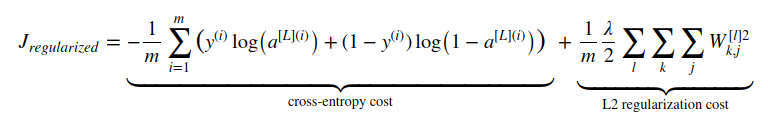

where (k, j) refer to the shape of W and l refers to the layer number

In [ ]:
# GRADED - 0.5 Marks
def regularization_L2(lmbda, W1, W2, W3, W4, m):
    '''
    Inputs:
    - lmbda: Regularization parameter
    - W1, W2, W3, W4: numpy arrays containing weights of the model
    - m: no of examples

    Outputs:
    - total_reg_loss: sum of L2 regularization loss of each layer
    '''
    
    # YOUR CODE HERE
    return lmbda*(np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)) + np.sum(np.square(W4)))/(2*m)

In [ ]:
# TEST CASE
assert np.allclose(regularization_L2(1,np.array([[1]]),np.array([[1]]),np.array([[1]]),np.array([[1]]),1),2)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

### Step 6: Making helper functions for backpropagation [2.75 marks]


Our next step will be to create some helper functions before starting backpropagation

We would need derivatives of **ReLU** function and **Sigmoid** function 

Hint: ReLU function derivative can be calculated in one step using lambda functions. For more information, refer to this link: https://www.w3schools.com/python/python_lambda.asp


Note the following rules for different activation functions:
$$ \frac{\partial \mathcal{(relu(z))} }{\partial z} =   \left\{
\begin{array}{ll}
      1 & z>=0 \\
      0& z < 0 \\
\end{array} 
\right.  $$
$$\frac{\partial \mathcal{(sigmoid(z))} }{\partial z} = sigmoid(z) * (1-sigmoid(z))$$


In [ ]:
# GRADED - 0.5 Marks

# Define two functions drelu and dSigmoid which return the respective derivatives
# input can be of any 1D, 2D shape

def drelu(z):
    
    # YOUR CODE HERE
    z[z>=0] = 1
    z[z<0] = 0
    return z

def dSigmoid(z):
    
    # YOUR CODE HERE
    sigz = sigmoid(z)
    return sigz*(1-sigz)

In [ ]:
# TEST CASE

assert np.allclose(drelu(np.array([[2,-3]])), np.array([[1,0]]))
assert np.allclose(dSigmoid(np.array([[1,-3]])), np.array([[0.19661193,0.04517666]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

Now, we would be creating a helper function to calculate and return the values of dz, dW, and db for each layer. Refer to the formulae provided below to get a clear understanding of it's implementation.

Note that the value of **dz depends on the derivatives of activation functions** used for that layer and the functions that we have created above may come in handy.

This function computes  $dZ^{[h]} = \frac{\partial \mathcal{L} }{\partial Z^{[h]}}$, given  $dA^{[h]} = \frac{\partial \mathcal{L} }{\partial A^{[h]}}$ and $Z^{[h]}$as inputs. It is based on the following chain rule from calculus:
$$ dZ^{[h]} = dA^{[h]} * \frac{\partial \mathcal{A^{[h]}} }{\partial Z^{[h]}}$$



  - $ dW^{[h]} = \frac{\partial \mathcal{L} }{\partial W^{[h]}} = \frac{1}{m} dZ^{[h]} A^{[h-1] T}$
  - $ db^{[h]} = \frac{\partial \mathcal{L} }{\partial b^{[h]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[h](i)}$
  - $ dW_{total}^{[h]} = dW^{[h]} + dW_{reg}^{[h]} $

where $ dW_{reg}^{[h]} = \frac{1}{m} * lambda * weight^{[h]} $ 

Try to use vectorization as far as possible instead of loops as it would be simpler for you to debug.

In [ ]:
# GRADED - 0.75 Marks

def back_prop_linear(da_layer, z_layer, input, act_fxn, m, lmbda, weight):
    '''
    Inputs:
    - da_layer: derivative of variable 'a' of that layer
    - z_layer: numpy array of 'z' values
    
    - input: input value of that layer, for example, X is the
    input for the first layer, and for other layers, it is the activation A of the previous layer
    
    - act_fxn: string containing the name of the activation 
    function used in that layer,i.e. 'sigmoid' or 'relu' (depending on this, the appropriate function is called)
    
    - m: number of datapoints
    - lmbda: regularization parameter
    - weight: weights of that particular layer
  
      Outputs:
    - dz: returns the derivative of linear function variable
    - dW: returns the change in weights for that layer
    - db: returns the change in bias for that layer
    '''
    
    # YOUR CODE HERE
    dz = da_layer*(drelu(z_layer) if act_fxn == 'relu' else dSigmoid(z_layer))
    dW = np.matmul(dz, input.T)/m + lmbda*weight*(1/m)
    db = (1/m)*np.sum(dz, axis = 1).reshape(-1, 1)
    return [dz, dW, db]

In [ ]:
# TEST CASE

m=1
# previous layer has 2 neurons and current layer has 2 neurons
z_h=np.array([[1],[2]])
da_h=np.array([[0.1],[0.2]])
inp=np.array([[1],[0]])
weights=np.array([[1,1],[2,0]])
dz, dW, db = back_prop_linear(da_h, z_h, inp, 'relu' , m, 1, weights)
assert np.allclose(dz,np.array([[0.1],[0.2]]))
assert np.allclose(dW,np.array([[1.1,1],[2.2,0]]))
assert np.allclose(db,np.array([[0.1],[0.2]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

Next we would need a helper function to calculate the derivatives of activation function variables

We will calculate dA for the last layer separately in the subsequent function.

For all other layers, we proceed as follows : 



Using this formula $ Z^{[h]} = W^{[h]}.A^{[h-1]}+b^{[h]}$


  - $ dA^{[h-1]} = \frac{\partial \mathcal{L} }{\partial A^{[h-1]}} = W^{[h] T} dZ^{[h]}$

In [ ]:
# GRADED - 0.25 Marks

def back_prop_actf(W_plusone, dz_plusone):
    '''
    Inputs:
    - W_plusone: Weights of the next layer
    - dz_plusone: Derivative of the linear function of the next
    layer

    Outputs:
    - act_dtive: returns the derivative of activation function variable
    '''
    
    # YOUR CODE HERE
    return np.dot(W_plusone.T, dz_plusone)

In [ ]:
# TEST CASE

# next layer has 2 neurons and current layer has 1, training samples=1
der=back_prop_actf(np.array([[1],[2]]), np.array([[2],[3]]))
assert np.allclose(der,np.array([[8]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

Now we will be creating the main function for backpropagation where we combine all the helper functions to update the weights. We will first compute errors at the last layer and backpropagate them through the network to get the desired $dW$ and $db$ for each layer.

We would using a single function to return these values as the formula remains the same.

To backpropagate through this network, we know that the output is, $ ypred = A^{[H]} = sigmoid(Z^{[H]})$. Your code thus needs to compute $ dA^{[H]} = \frac{\partial \mathcal{L}}{\partial A^{[H]}}$. To do so, use this formula:
$$ dA^{[H]} = -(Y / A^{[H]} - (1-Y)/(1-A^{[H]}))$$
where $ "/" \ denotes \ elementwise \ division$

Remember: This is only for the last layer, use the above helper function for the other layers.

**HINT:** Use the back_prop_linear function to obtain $dz,dW,db$ at each layer.

Refer to the architecture to decide which activation function to pass as parameter to back_prop_linear at each step.

In [ ]:
# GRADED - 1.25 Marks

def Backpropagation1(X, yd, l, y_pred, parameters, lmbda):
    '''
      Inputs:
      - X: Input features - shape (no of features, no of examples)
      - yd: y desired values(labels given in dataset)
      - l: list containing values of 'z' and 'a' of each layer
      - parameters: list containing weights and biases of each layer
      - lmbda: regularization parameter

      Outputs:
      - grad: dictionary containing the change in the values of weights
      and biases with keys 'dW1','db1','dW2','db2','dW3','db3','dW4','db4' 
    '''
    
    # YOUR CODE HERE
    z1, a1, z2, a2, z3, a3, z4, a4 = l
    W1, b1, W2, b2, W3, b3, W4, b4 = parameters
    m = X.shape[1]
    da4 = -(yd/y_pred - (1-yd)/(1-y_pred))
    dz4, dW4, db4 = back_prop_linear(da4, z4, a3, 'sigmoid', m, lmbda, W4)
    da3 = back_prop_actf(W4, dz4)
    dz3, dW3, db3 = back_prop_linear(da3, z3, a2, 'relu', m, lmbda, W3)
    da2 = back_prop_actf(W3, dz3)
    dz2, dW2, db2 = back_prop_linear(da2, z2, a1, 'relu', m, lmbda, W2)
    da1 = back_prop_actf(W2, dz2)
    dz1, dW1, db1 = back_prop_linear(da1, z1, X, 'relu', m, lmbda, W1)
    return {'dW1': dW1,'db1': db1,'dW2': dW2,'db2': db2,'dW3': dW3,'db3': db3,'dW4': dW4,'db4': db4}

In [ ]:
# TEST CASE

grads_check ={'dW1': np.array([[0.00514617, 0.00304731], [0.00491755, 0.00362823]]),
 'dW2': np.array([[0.00386176, 0.00149626], [0.00509719, 0.00027167]]),
 'dW3': np.array([[0.00157179, 0.00249544],[0.00424661, 0.00135477]]),
 'dW4': np.array([[0.0045669 , 0.00526779]]),
 'db1': np.array([[1.30736949e-07],[2.27511738e-08]]),
 'db2': np.array([[1.03558795e-06],[5.99022049e-07]]),
 'db3': np.array([[9.07529097e-06],[1.03415032e-05]]),
 'db4': np.array([[0.00010516]])}

np.random.seed(4)
parameters = Initialization(2, 2, 2, 2, 1)
X = np.array([[1,2],[2,3]])
y_pred, l = feed_forward(X, parameters)
grads = Backpropagation1(X, np.array([[1,0]]), l, y_pred, parameters, lmbda = 0.1)
for key in grads_check.keys():
    assert np.allclose(grads_check[key],grads[key]) 
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

The weights are now updated in each iteration via the learning rules:

$$ W^{[h]} = W^{[h]} - \alpha \text{ } dW^{[h]} $$
$$ b^{[h]} = b^{[h]} - \alpha \text{ } db^{[h]} $$

- We are done with most of the code now, yet there is the most important function left to be created - where we will be training our model.

- Refer to the overview again before writing a code for this function.

- You will have to call the above functions repeatedly and update the weights and bias with each iteration

- The values of number of iterations(num_iters), learning rate($\alpha$) and regularization parameter(lmbda) **have been already tuned**. If you wish to experiment on these variables for a better understanding, you are free to do so. The final result, however, will be evaluated using the values given.

### Step 7: Training function [1.25 marks]

For training the model you need to do the following in the next function:

1) You are provided with *X, yd, parameters* as arguments. *X* and *yd* are scaled so **DO NOT** scale them again inside this *training* function 

2) Store W1 to W4 and b1 to b4 (weights and biases) in **seperate variables** by accessing the *parameters* argument

3) Initialise an empty list to which you will append the loss of every iteration

4) Now for N number of iterations:
     - compute y_predicted and a5 using feedforward
     
     - compute loss using y_predicted and yd - say loss_1
     
     - calculate regularization loss say loss_2
     
     - total loss = loss_1 + loss_2
     
     - append this to the list you created in step 3
     
     - calculate gradients
     
     - update W1 to W4 and b1 to b4 by using the gradients calculated above
     
     - in the next iteration, when using feed forward use these updated W1 to W4 and b1 to b4
     
     - And then follow this for N iterations
     
5) Return the history of loss (that list you created in step 3 populated with loss of every iteration) and the trained *W* and *b*

In [ ]:
# GRADED - 1.25 Marks

# Make a habit to print the value of loss after a fixed number of iterations to 
# check whether your model is working well or not.

def training(X, yd, parameters, alpha = 0.01, num_iters=3000, lmbda = 0.0001):
    '''
      Inputs:
      - X: Input features - shape (no of features, no of examples)
      - yd: y desired values(labels given in dataset)
      - alpha: learning rate
      - num_iters: number of iterations
      - lmbda: regularization parameter

      Outputs:
      - history: list of loss at the start of each iteration 
      - parameters: the final parameters 
    '''
    
    # YOUR CODE HERE
    
    m = X.shape[1]
    losses = []

    for iter in range(num_iters):
      y_pred, l = feed_forward(X, parameters)
      loss_1 = loss_compute(y_pred, yd)
      W1, b1, W2, b2, W3, b3, W4, b4 = parameters
      loss_2 = regularization_L2(lmbda, W1, W2, W3, W4, m)
      total_loss = loss_1 + loss_2

      # if(iter%100 == 0):
      #   print(f"Loss @ {iter}: {total_loss}")

      losses.append(total_loss)

      grads = Backpropagation1(X, yd, l, y_pred, parameters, lmbda)

      parameters[0] -= alpha*grads['dW1']
      parameters[1] -= alpha*grads['db1']
      parameters[2] -= alpha*grads['dW2']
      parameters[3] -= alpha*grads['db2']
      parameters[4] -= alpha*grads['dW3']
      parameters[5] -= alpha*grads['db3']
      parameters[6] -= alpha*grads['dW4']
      parameters[7] -= alpha*grads['db4']
    
    return np.array(losses), parameters

In [ ]:
# SAMPLE TEST CASE
'''
You can also play around with the model hyper-parameters to see if you can improve on our results
Try changing:
    - The model architecture (number of layers, number of neurons in each layer)
    - The batch size
    - The learning rate
    
Make sure you set the parameters to their original values before submitting the assignment
'''
np.random.seed(4)
parameters = Initialization(2, 100, 100, 50, 1)
losses,parameter = training(np.array([[1,2],[2,3],[1,7],[4,3],[0,2],[5,3],[1,4],[2,2],[1,5],[2,8],[1,0],[2,6],[1,4]]).T, np.array([[1,0,1,1,0,0,0,0,1,1,1,0,0]]), parameters ,alpha = 0.001, num_iters=2000, lmbda = 0.1)
assert len(losses)==2000
assert np.allclose(losses[1500],0.881461290332970053)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

In [ ]:
# DATASET PREPARATION (UNGRADED)
df = load_dataset()
df['Sex'][df['Sex']=='male'] = 1
df['Sex'][df['Sex']=='female'] = 0
X_df = df.iloc[:,2:] 
Y = np.array(df['Survived']).astype(int)
Y = Y.reshape(1, Y.shape[0])
X = np.array(X_df).astype(float)
X = X.reshape(X.shape[0],6)
X = standardize(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

## run this cell to begin training . This may take a few minutes to run.

np.random.seed(4)
parameters = Initialization(6, 10, 20, 10, 1)
losses, parameters_final = training(X.T, Y ,parameters, alpha = 0.05, num_iters=5000, lmbda = 0.0001)

To self-evaluate the result obtained, plot the loss function with respect to the number of iterations and rethink the algorithm if your loss function is not reaching a minimum value.

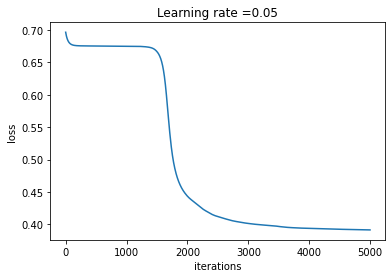

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.05))
plt.show()

### LAST STEP [0.5 marks]
**Checking the accuracy on test and train data to check if the model is overfitting or underfitting the given data.** 

- Run the forward propagation using the updated parameter values and check for the given conditions in the value of 'y' received. **If they are greater than 0.5 then the result is '1', otherwise '0'.**

Henceforth, compare the values of these 1s and 0s to 'yd' and calculate accuracies.

The accuracy you should get should be between 0.80 to 0.85. 

In [ ]:
# GRADED - 0.5 Marks

def predict(X, yd, parameters_final):
    '''
      Inputs:
      - X: Input features
      - yd: y desired values(labels given in dataset)
      - parameters_final: final updated values of parameters

      Outputs: 
      - Returns the accuracy 
    '''
    
    # YOUR CODE HERE
    y, _ = feed_forward(X, parameters_final)
    y = [y>0.5]
    m = X.shape[1]
    return np.sum((y==yd))/m


In [ ]:
#SAMPLE TEST CASE

parameters=[np.array([[0.1,-0.2]]),np.array([[0]]),np.array([[0.2]]),np.array([[0]]),np.array([[0.2]]),np.array([[0.1]]), np.array([[0.2]]), np.array([[0.2]])]
acc=predict(np.array([[1,2,3,4],[3,2,1,-5]]),np.array([[1,0,0,0]]),parameters)
assert np.allclose(acc,0.25)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify

In [ ]:
# DO NOT CHANGE, RUN AS GIVEN

acc=predict(X.T, Y, parameters_final)
print("Training Accuracy: {} %".format(acc*100))

Training Accuracy: 84.17366946778712 %


# Part III - Using Genetic Algorithm to solve 0-1 Knapsack Problem

## 0-1 Knapsack Problem

It is midnight, and you are a thief who has entered the house of the richest man in your city. You have with you a sack made of jute. Everyone is sound asleep, and the person is too gullible to have arranged any security system. You enter the vault, and see it filled with valuable stuff. You have a special pair of goggles, wearing which you can get the weight and market-value of every item you see; however, your jute sack would break if it contains a load more than a certain known value.

The problem presented by the above scenario is called the 0-1 knapsack problem. Formally, given a set of N valuable items, each with a weight w_i and value v_i  (for 1<= i<=N), you need to maximize the value that you carry back in your sack, with the constraints that the sack cannot carry more that W weight and you cannot break any of the N items (i.e., you cannot carry a “fraction” of any item).


The following class "Item" defines each item in the vault, whih has a name (a number in the range [1, total_number_of_items]), a weight, and a value.

In [ ]:
class Item:
    def __init__(self,name,value,weight):
        self.name = name
        self.value = value
        self.weight = weight

We now generate the data for 50 items using np.random.randint(). This will serve as the problem instance that needs to be solved.

In [ ]:
np.random.seed(100)
items = []
itemName = ['Cash','Necklace','Rings','Diamonds','Gold','Watch','Phone','Laptop'
        ,'Earrings','Bangles']
for i in range(10):
    item = Item(itemName[i],np.random.randint(1000,10000),np.random.randint(10,51))
    items.append(item)

In [ ]:
#Printing all items with their weights and values
total_val, total_wt = 0,0
printItems = []
for i in items:
    printItems.append([i.name,i.value,i.weight])
    total_val += i.value
    total_wt += i.weight

print(f"Total value of all items is {total_val} and weight is {total_wt}")
print(tabulate(printItems,headers=['Name','Value','Weight']))

Total value of all items is 50304 and weight is 278
Name        Value    Weight
--------  -------  --------
Cash         6640        34
Necklace     9039        33
Rings        1079        20
Diamonds     1350        44
Gold         5149        12
Watch        8906        24
Phone        1802        34
Laptop       2340        26
Earrings     6769        39
Bangles      7230        12


## Genetic Algorithm
A genetic algorithm (GA) is a method for solving both constrained and unconstrained optimization problems based on a natural selection process that mimics biological evolution.
source:https://www.sciencedirect.com/topics/engineering/genetic-algorithm


In Summary, the Genetic Algorithm entails the following: -

Step 0. Initialize the population of genes with random values. In this case, a value in a gene is simply a boolean value representing whether or not an item of the corresponding index is present or absent from the set of chosen objects in the knapsack.

Step 1. Fitness calculation: Calculating the fitness of each "gene" in the population, which in this case is the sum total of the value of the objects in the knapsack represented by the gene. Find the best fitness among these, and update the Global Best accordingly. Note that if the total weight of the solution presented by the gene is greater than the weight of the knapsack, its fitness would be 0 (or a very small value, such that we do not encounter a division_by_0 error later).
    
Step 2. Natural Selection: Creating a mating pool from all these genes, keeping in mind the 'survival of the fittest' principle: A gene with higher fitness has higher chance of being selected. 

Step 3. Generating a New Population: We create a new population of size "popSize - eliteSize" in the following way: Each new member will be formed by "Crossing Over" two randomly selected genes from the mating pool. The new member will then undergo mutation with a probability = mutationRate

Step 4. This process from steps 1 to 3 continues for certain number of iterations (also called generations). Note that you have to keep incrementing the generations attribute when generating a new generation of the population.
    
Apart from the above basic steps, there is another behavior called "Elitism": the best "eliteSize" number of genes from every generation are directly passed to the next generation.

The following is a DNA class wherein we encode the items present in the candidate as a binary list of items(of fixed length since the total number of items is fixed). For example, [1,0,1,1] means that the 1st, 3rd and the 4th item are present in the candidate solution. We also have implemented functions getDNA(), getItems() which are used to get a binary string indicating the items present and string containing items(names) present in the candidate. You are to implement calcFitness(), crossover() and mutate(). You can find their description in the docstring for each of them.

***NOTE*: wherever random number needs to be generated use the np.random.randint() or np.random.random() functions. Please do the tasks in the order in which they are specified, since random numbers are being generated in accordance with the seed, your answer may not correspond to the solution, but may be correct. No such recheck requests will be entertained.**

In [ ]:
class DNA:
    '''
    This class is used to denote the candidate solutions present in a generation
    
    genes: contains a binary list indicating the presence of an item in itemList, based on their index in the itemList
    fitness: the fitness value in the current generation
    weight: the weight of the knapsack for the candidate solution
    '''
 
    def __init__(self,len):
        '''
        This function is used to initialize an object of class DNA, list of items present is generated
        randomly by generating a random number between 1 and 10 and apply a mod 2 over 
        each instance
        '''
        self.genes = [np.random.randint(1,10)%2 for i in range(len)]
        self.fitness = 0
        self.weight = 0

 
    def getDNA(self):
        '''
        This function is used to get a binary string representation of the items present in the 
        candidate solution  
        '''
        return "".join([str(i) for i in self.genes])
 
    def calcFitness(self, itemList, totalWeight,regulate=0.001):
        '''
        This function is used to set and return the fitness of the given candidate 
        solution and hence check the feasibility of the candidate solution.
 
        THE REASON FOR THE REGULATE ARGUMENT: IF THE FITNESS OF ALL THE 
        CANDIDATE SOLUTIONS IS ZERO THEN IT MIGHT CAUSE UNDEFINED BEHAVIOUR OR CAUSE AN 
        ERROR, SO WE SET THE FITNESS VALUE TO SOME SMALL NON-ZERO VALUE
        '''
        # We set the initial value of the weight and value
        weight = 0
        value = 0
 
        # Tasks:
        # Enumerate through the itemList, and add the weight and value of item if present in the candidate solution ...
        # ... (remember the genes list is a binary list indicating the presence of items in the itemList list)
        # set the self.weight equal to the weight
        # if the weight > weight of knapsack set the self.fitness to regulate else value 
        # return the fitness value
 
        for idx, present in enumerate(self.genes):
          if present:
            value += itemList[idx].value
            weight += itemList[idx].weight
        
        self.weight = weight

        if self.weight > totalWeight:
          self.fitness = regulate
          
        else:
          self.fitness = max(value, regulate)
        
        return self.fitness
        
  
    def crossover(self, partner):
        '''
        This function is used to implement single point crossover between partner and the current object
        
        Just like in genetics we have chromosomes crossing over, here inherit some genes from parent1 and some other genes from parent2
        This can be done by copying the some portions of genes from parent1 and parent2
        '''
 
        # Tasks:
        # Create a "new" child object 
        # get the point for crossover by getting a random int between 0 (incl) and len(self.genes) (excl)
        # set child.genes equal to self.genes for genes > (after) crossover point and ... 
        # ... partner.genes <= (before and at that) crossover point
        # return the child
 
        # YOUR CODE HERE
        child = DNA(len(self.genes))
        crossover_point = np.random.randint(0, len(self.genes))
        child.genes[crossover_point+1:] = self.genes[crossover_point+1:]
        child.genes[:crossover_point+1] = partner.genes[:crossover_point+1]

        return child
  
    def mutate(self, mutationRate):
        '''
        This function is used to cause mutations in the candidate solution (/genes)

        Just like in genetics, we will try and emulate mutation which might lead to better or worse candidate solution, 
        thereby focussing more on exploration than exploitation
        This can be done by generating a probability value for each of the gene(item) and toggling it (if set then reset and vice-versa)	
        '''
        # Tasks:
        # iterate over genes and generate a random number between 0 and 1 (prob) for each gene/item
        # if prob generated < mutationRate, toggle the bit
 
        # YOUR CODE HERE
        for i in range(len(self.genes)):
          random_num = np.random.random()

          if random_num <mutationRate:
            self.genes[i] ^= 1
 
    def getItems(self, itemList):
        '''
        This function is used to get a list of items (named list of items) present in the 
        candidate solution  
        '''
        items = []
        for i, item in enumerate(itemList):
            if self.genes[i] == 1:
                items.append(item.name)
        
        return ",".join(items)

In [ ]:
items = []
np.random.seed(1)
for i in range(20):
    item = Item(f'{i+1}',np.random.randint(1,50),np.random.randint(1,50))
    items.append(item)


In [ ]:
# Sample Test Case for calcFitness()
np.random.seed(0)
dna1 = DNA(len(items))
dna2 = DNA(len(items))
dna3 = DNA(len(items))

print(f'Fitness of dna1 corresponding to the \"items\" list and the weight 1000 is {dna1.calcFitness(items,1000)}')
print(f'Fitness of dna2 corresponding to the \"items\" list and the weight 20 is {dna2.calcFitness(items,20)}')
print(f'Fitness of dna3 corresponding to the \"items\" list and the weight 1000 is {dna3.calcFitness(items,100)}')
print('Can you guess why is the fitness 0.001 in case of dna2 and dna3?')

assert np.allclose(dna1.calcFitness(items,1000),149)
assert np.allclose(dna2.calcFitness(items,20),0.001)
assert np.allclose(dna3.calcFitness(items,100),0.001)

print('Sample Test passed', '\U0001F44D')

Fitness of dna1 corresponding to the "items" list and the weight 1000 is 149
Fitness of dna2 corresponding to the "items" list and the weight 20 is 0.001
Fitness of dna3 corresponding to the "items" list and the weight 1000 is 0.001
Can you guess why is the fitness 0.001 in case of dna2 and dna3?
Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify - 1 MARK

In [ ]:
# Sample Test Case for crossover()
np.random.seed(0)
dna1 = DNA(len(items))
dna2 = DNA(len(items))
dna3 = DNA(len(items))
dna4 = DNA(len(items))

print('Crossover between dna1 and dna2, can you spot the crossover site?')
print(dna1.genes)
print(dna2.genes)
child12 = dna1.crossover(dna2)
print(child12.genes)

assert np.allclose(child12.genes,[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0])

print('\n\nCrossover between dna3 and dna4, can you spot the crossover site?')
print(dna3.genes)
print(dna4.genes)
child34 = dna3.crossover(dna4)
print(child34.genes)

assert np.allclose(child34.genes,[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

print('\nSample Test passed', '\U0001F44D')

Crossover between dna1 and dna2, can you spot the crossover site?
[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]
[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]


Crossover between dna3 and dna4, can you spot the crossover site?
[0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1]
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1]

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify - 0.5 MARK

In [ ]:
# Sample Test Case for mutate()
np.random.seed(0)
dna1 = DNA(len(items))
dna2 = DNA(len(items))
dna3 = DNA(len(items))

strDNA1 = dna1.getDNA()
strDNA2 = dna2.getDNA()
strDNA3 = dna3.getDNA()

dna1.mutate(0.1)
dna2.mutate(0.5)
dna3.mutate(0.9)

mutateDNA1 = dna1.getDNA()
mutateDNA2 = dna2.getDNA()
mutateDNA3 = dna3.getDNA()

print(f'{strDNA1} mutates to {mutateDNA1}')
print(f'{strDNA2} mutates to {mutateDNA2}')
print(f'{strDNA3} mutates to {mutateDNA3}')

assert np.allclose(dna1.genes,[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0])
assert np.allclose(dna2.genes,[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])
assert np.allclose(dna3.genes,[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

print('Sample Test passed', '\U0001F44D')

01000001101110100100 mutates to 01000001101110100100
11010011010000010110 mutates to 01111001011111101010
01011110011101100001 mutates to 10101001100010011100
Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify - 0.5 MARK

In [ ]:
class Population:
    '''
    This class defines a population of "DNA", i.e., a population of genes. The class first initializes a population of size "popSize" randomly: this is the 0th generation.
    The class then defines the behavior of each "gene" of the population in each generation. These behaviors are: -

    1. Fitness calculation: Calculating the fitness of each "gene" in the population, which in this case is the sum total of the value of the objects in the knapsack represented by the gene. Find the best fitness among these, and update the Global Best accordingly.
    2. Natural Selection: Creating a mating pool from all these genes, keeping in mind the 'survival of the fittest' principle: A gene with higher fitness has higher chance of being selected.
    3. Generating a New Population: We create a new population of size "popSize - eliteSize" in the following way: Each new member will be formed by "Crossing Over" two randomly selected genes from the mating pool. The new member will then undergo mutation with a probability = mutationRate
    4. This process continues. Note that you have to keep incrementing the generations attribute for each new generation of the population.
    
    Apart from the above basic steps, there is another behavior called "Elitism": the best "eliteSize" number of genes from every generation are directly passed to the next generation.
    '''
    def __init__(self, itemList, totalWeight, eliteSize, mutationRate = 0.01, popSize = 50):
        '''
        This is the class constructor. It initializes the class variables like elite[], which contains the "elite" genes of each generation. The size of the list is eliteSize.
        Also initialized here is the initial population (0th generation): randomly generated sets of possible solutions.
        '''
        
        self.eliteSize = eliteSize
        self.elite = []
        self.population = []
        self.matingPool = []
        self.generations = 0
        self.itemList = itemList
        self.totalWeight = totalWeight
        self.popSize = popSize
        self.mutationRate = mutationRate
        self.bestScore = 0
        self.best = ""
        
        for i in range(self.popSize):
            self.population.append(DNA(len(itemList)))
        
        self.calcPopFitness()

    
    def calcPopFitness(self):
        '''
        A very basic function which calculates the fitness of each gene in the population.
        '''
        for i in range(self.popSize):
            self.population[i].calcFitness(self.itemList,self.totalWeight)
  
    
    def getElite(self):
        '''
        This function is used to get the "elitSize" number of genes from the population which have the highest fitness
        '''
 
        # Tasks:
        # Use splicing to get the first "eliteSize" elements from this sorted list
        # Set the population to be equal to the remaining part of the sorted list
        # reduce the popSize to popSize-eliteSize

        sortedPop = sorted(self.population, key=lambda x: x.calcFitness(self.itemList,self.totalWeight), reverse=True)

        # YOUR CODE HERE
        self.elite = sortedPop[:self.eliteSize]
        self.population = sortedPop[self.eliteSize:]
        self.popSize -= self.eliteSize

    def naturalSelection(self):
        '''
        This function generates the matingPool attribute of the population object.
        The idea is to assign to each gene a "probability" of being selected to the mating pool, such that the "probability" is proportional to its fitness
        '''
 
        # Tasks:
        # Re-initialize the mating pool attribute to an empty list. This is required because each generation must have a unique mating pool.
        # Find the sum total of fitnesses of all genes in the population
        # Scale each fitness to a value between 0 and 1000 by dividing each fitness value by the sum total of fitnesses and multiplying it by 1000...
        # ... also take the floor of each scaled fitness value and convert the array to have integer values
        # Now append each gene to the mating pool as many times as its scaled fitness values
        # (What are we trying to do here? HINT: Think about roulette wheel selection)

        # YOUR CODE HERE
        self.matingPool = []
        totalFitness = 0
        for i in range(self.popSize):
          totalFitness += self.population[i].fitness
        
        for i in range(self.popSize):
          currFitness = self.population[i].fitness
          currFitness = int(math.floor((currFitness/totalFitness)*1000))
          
          for _ in range(currFitness):
            self.matingPool.append(self.population[i])


    def generateNewPopulation(self):
        '''
        This function generates a new generation of the population. Each member of the new generation (except elite members which need to be added to the new generation (see merge() function below)) will be created by selecting two random genes ("parents") from the mating pool and "crossing over" them.
        The child will then be mutated with a probability equal to mutationRate 
        '''
 
        # Tasks: run a loop for i in the range 0 to popSize, and in each step do the following: -
        # select two random genes from the mating pool: generate two random integers (which will act as index numbers) in the range [0, size_of_mating_pool) ...
        # ... then get the genes corresponding to these index numbers from the mating pool, make sure in this step you are using np.random.randint() to generate indices ...
        # ... and then indexing the parents from self.matingPool 
        # create a new gene by using the crossover() function on these 2 genes
        # mutate the new gene with rate =  mutationRate
        # assign the ith index of the population to this new Size

        # Now exit the loop, and increment the generations attribute of the population by 1.

        # YOUR CODE HERE
        for i in range(self.popSize):
          idx1, idx2 = np.random.randint(0, len(self.matingPool)), np.random.randint(0, len(self.matingPool))
          gene1, gene2 = self.matingPool[idx1], self.matingPool[idx2]

          child = gene1.crossover(gene2)
          child.mutate(self.mutationRate)
          self.population[i] = child
        
        self.generations += 1
  
    def getBest(self):
        return self.best
  
    def evaluate(self):
        worldrecord = 0
        index = 0
        for i in range(self.popSize):
            if self.population[i].fitness > worldrecord:
                index = i
                worldrecord = self.population[i].fitness

        if self.bestScore < worldrecord:
            self.best = self.population[index]
            self.bestScore = worldrecord

    def merge(self):
        '''
        This function appends the list elite[] to the population
        '''
 
        # Tasks:
        # append elite[] to population[]
        # increase popSize to popSize + eliteSize
        
        # YOUR CODE HERE
        for b in self.elite:
          self.population.append(b)
        self.popSize += self.eliteSize
  
    def getGenerations(self):
        return self.generations

    def averageFitness(self):
        return np.average(np.array([self.population[i].fitness for i in range(self.popSize)]))

In [ ]:
def generateSummary(population):
    summary = []
    summary.append(population.getGenerations())
    best = population.getBest()
    summary.append(population.averageFitness())
    summary.append(best.fitness)
    summary.append(best.weight)
    summary.append(best.getItems(items))
    return summary

In [ ]:
totalWeight = 300
popSize = 200
mutationRate = 0.02
eliteSize = 10
iterations = 500
history = []

np.random.seed(100)
items = []
for i in range(50):
    item = Item(f'{i+1}',np.random.randint(1,50),np.random.randint(1,50))
    items.append(item)

In [ ]:
def plotGenerations(history):
    '''
    This is a function to visualize the maximum fitness and avg fitness across generations
    '''

    maxFitness = [x[2] for x in history]
    avgFitness = [x[1] for x in history]
    figure(figsize=(8, 6), dpi=80)
    plt.plot(maxFitness, '-bx')
    plt.plot(avgFitness, '-rx')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend(['Max Fitness', 'Avg Fitness'])
    plt.title('Fitness vs Generation')

In [ ]:
#sample test case for getElite()
np.random.seed(100)
eliteSize = 5
population = Population(items, totalWeight, eliteSize, mutationRate, popSize)
population.getElite()

assert np.allclose([i.genes for i in population.elite],[[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0], [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]])
assert np.allclose(population.popSize, 195)

print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify - 0.25 MARK

In [ ]:
#sample test cases for naturalSelection()
np.random.seed(100)
population = Population(items, totalWeight, eliteSize, mutationRate, popSize)
population.naturalSelection()

assert np.allclose(len(population.matingPool), 800)
assert np.allclose([i.genes for i in population.matingPool[560:570]], [[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0], [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0], [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0], [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0], [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0], [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify - 1 MARK

In [ ]:
#Sample Test Case for generateNewPopulation()
np.random.seed(100)
population = Population(items, totalWeight, eliteSize, mutationRate, popSize)
population.naturalSelection()
population.generateNewPopulation()

assert np.allclose([i.genes for i in population.population[160:170]], [[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1], [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1], [1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0], [0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]])
assert np.allclose(population.generations, 1)

print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [ ]:
# hidden test cases. Do not modify - 0.75 MARK

In [ ]:
# Sample Test Case without Elitism
# Test your code to see whether your code is working properly or not
items = []
np.random.seed(101)
for i in range(20):
    item = Item(f'{i+1}',np.random.randint(1,50),np.random.randint(1,50))
    items.append(item)

totalWeight = 300
popSize = 250
mutationRate = 0.01
eliteSize = 10
iterations = 50
history = []

population = Population(items, totalWeight,eliteSize, mutationRate, popSize)
 
while(population.generations < iterations):
    population.naturalSelection()
    population.generateNewPopulation()
    population.calcPopFitness()
    population.evaluate()
    history.append(generateSummary(population))

assert np.allclose(history[0][1],253.82) and np.allclose(history[0][2],441)
assert np.allclose(history[24][1],373.96) and np.allclose(history[24][2],482)
assert np.allclose(history[49][1],401.612) and np.allclose(history[49][2],486)
print('Sample Test passed', '\U0001F44D \n\n')

print(tabulate(history,headers = ['Generation','Avg Fitness','Max Fitness','Weight','Item List']))

Sample Test passed 👍 


  Generation    Avg Fitness    Max Fitness    Weight  Item List
------------  -------------  -------------  --------  ---------------------------------------
           1        253.82             441       293  1,2,4,6,7,8,9,10,11,12,13,14,16,17,20
           2        266.008            441       293  1,2,4,6,7,8,9,10,11,12,13,14,16,17,20
           3        287.3              441       293  1,2,4,6,7,8,9,10,11,12,13,14,16,17,20
           4        283.716            444       249  1,2,4,7,8,10,11,12,13,14,15,16,19,20
           5        306.764            451       287  1,2,3,4,5,7,8,10,11,12,13,14,16,17,18
           6        314.86             451       287  1,2,3,4,5,7,8,10,11,12,13,14,16,17,18
           7        314.36             468       261  1,2,3,4,7,8,10,11,12,13,14,15,16,19,20
           8        325.352            468       261  1,2,3,4,7,8,10,11,12,13,14,15,16,19,20
           9        324.812            468       261  1,2,3,4,7,8,10,11,12,13,14,

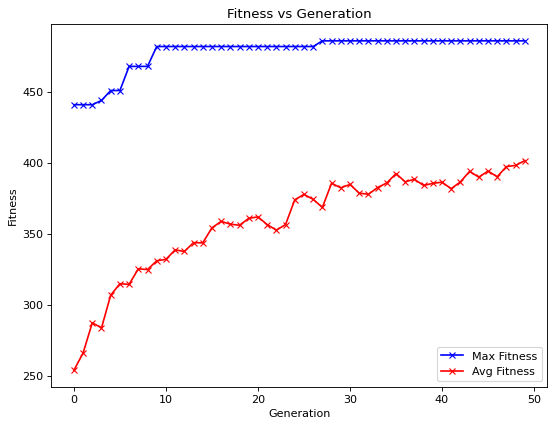

In [ ]:
plotGenerations(history)

In [ ]:
# Sample Test Case with Elitism
# Getting it all together see if your getElite() and merge() are working properly or not
items = []
np.random.seed(101)
for i in range(20):
    item = Item(f'{i+1}',np.random.randint(1,50),np.random.randint(1,50))
    items.append(item)

totalWeight = 300
popSize = 250
mutationRate = 0.01
eliteSize = 10
iterations = 50
history = []

population = Population(items, totalWeight,eliteSize, mutationRate, popSize)
 
while(population.generations < iterations):
    population.getElite()
    population.naturalSelection()
    population.generateNewPopulation()
    population.merge()
    population.calcPopFitness()
    population.evaluate()
    history.append(generateSummary(population))

assert np.allclose(history[0][1],256.612) and np.allclose(history[0][2],441)
assert np.allclose(history[24][1],370.684) and np.allclose(history[24][2],473)
assert np.allclose(history[49][1],404.444) and np.allclose(history[49][2],482)
print('Sample Test passed', '\U0001F44D \n\n')

print(tabulate(history,headers = ['Generation','Avg Fitness','Max Fitness','Weight','Item List']))

Sample Test passed 👍 


  Generation    Avg Fitness    Max Fitness    Weight  Item List
------------  -------------  -------------  --------  ---------------------------------------
           1        256.612            441       293  1,2,4,6,7,8,9,10,11,12,13,14,16,17,20
           2        280.388            441       293  1,2,4,6,7,8,9,10,11,12,13,14,16,17,20
           3        276.324            441       293  1,2,4,6,7,8,9,10,11,12,13,14,16,17,20
           4        288                441       293  1,2,4,6,7,8,9,10,11,12,13,14,16,17,20
           5        298.584            441       293  1,2,4,6,7,8,9,10,11,12,13,14,16,17,20
           6        296.008            441       293  1,2,4,6,7,8,9,10,11,12,13,14,16,17,20
           7        310.58             450       270  1,2,3,4,5,7,8,10,11,12,13,16,18,20
           8        316.012            462       266  1,2,3,4,5,7,8,10,11,12,13,14,15,16,19
           9        309.868            462       266  1,2,3,4,5,7,8,10,11,12,13,14,15

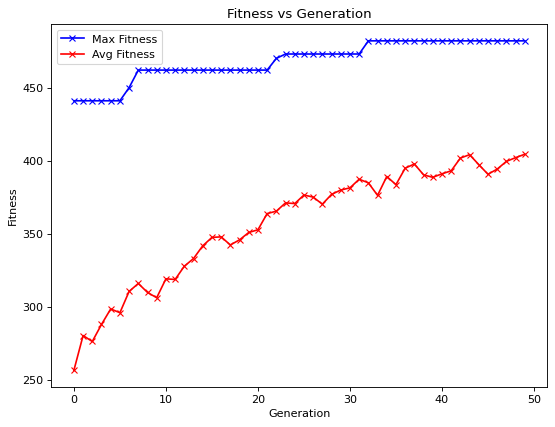

In [ ]:
plotGenerations(history)

In [ ]:
# hidden test cases. Do not modify - 1 MARK

#Thank You!
This completes the assignment. Kudos on making it this far! We hope that you learnt some new things from this assignment and that it was interesting and engaging!